In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [47]:
housing_data_uncleaned = pd.read_csv("data/PrimaryDataset-MLS-RentalProperties.csv")

print(housing_data_uncleaned.shape)
housing_data_uncleaned.info()



(1749, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   List Number                           1749 non-null   object 
 1   Agency Phone                          1736 non-null   object 
 2   Listing Agent                         1749 non-null   object 
 3   Co-Listing Agent                      285 non-null    object 
 4   Property Type                         1749 non-null   object 
 5   Card Format                           1749 non-null   object 
 6   Book Section                          1749 non-null   object 
 7   Property Sub Type                     1749 non-null   object 
 8   Listing Contract Date                 1749 non-null   object 
 9   Back on Market Date                   78 non-null     object 
 10  Status                                1749 non-null   object 
 11  Status

In [48]:
housing_data_uncleaned.columns

Index(['List Number', 'Agency Phone', 'Listing Agent', 'Co-Listing Agent',
       'Property Type', 'Card Format', 'Book Section', 'Property Sub Type',
       'Listing Contract Date', 'Back on Market Date', 'Status',
       'Status Change Timestamp', 'Original List Price', 'List Price',
       'Living Area Source', 'MLS Area Major', 'Lock Box Number',
       'Street Direction Prefix', 'Street Direction Suffix',
       'Non-Representative Compensation Type', 'City', 'State', 'County',
       'Country', 'Postal Code', 'Stories Total', 'Stories', 'Latitude',
       'Longitude', 'GeoID', 'Living Area', 'Year Built', 'Direction Faces',
       'Lot Size Dimensions', 'Bedrooms Total', 'Bathrooms Total',
       'Bathrooms Full', 'Bathrooms Half', 'Parcel Number', 'Owner Name',
       'mod_timestamp', 'Association Fee Frequency', 'Occupant Type',
       'Listing Agreement', 'Association Fee 2 Frequency', 'Listing Service',
       'Lease Term', 'Association Fee', 'Building Area Total', 'Garage Sp

In [49]:
relevant_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Waterfront YN', 'Garage YN', 'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage YN', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude', 'Rooms', 'Features'
]

numerical_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude'
]

# Drop the irrelevant columns
numerical_housing_data = housing_data_uncleaned[numerical_columns]



In [50]:
numerical_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   List Price                       1749 non-null   int64  
 1   Bedrooms Total                   1749 non-null   int64  
 2   Bathrooms Total                  1749 non-null   int64  
 3   Living Area                      1749 non-null   float64
 4   MLS Area Major                   1749 non-null   int64  
 5   Year Built                       1749 non-null   int64  
 6   Lot Size Acres                   1283 non-null   float64
 7   Days on Market                   1749 non-null   int64  
 8   Non-Representative Compensation  1732 non-null   float64
 9   Stories Total                    1742 non-null   float64
 10  Stories                          869 non-null    float64
 11  Bedrooms Total                   1749 non-null   int64  
 12  Bathrooms Total     

In [51]:
housing_data = numerical_housing_data.dropna()

In [52]:
housing_data

housing_data.to_csv('data/numerical_housing_data.csv', index=False)


In [53]:
from sklearn.ensemble import IsolationForest

model1 = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), random_state=12)

x = housing_data

model1.fit(x)

predict = model1.predict(x)
anomalies = x[predict == -1]

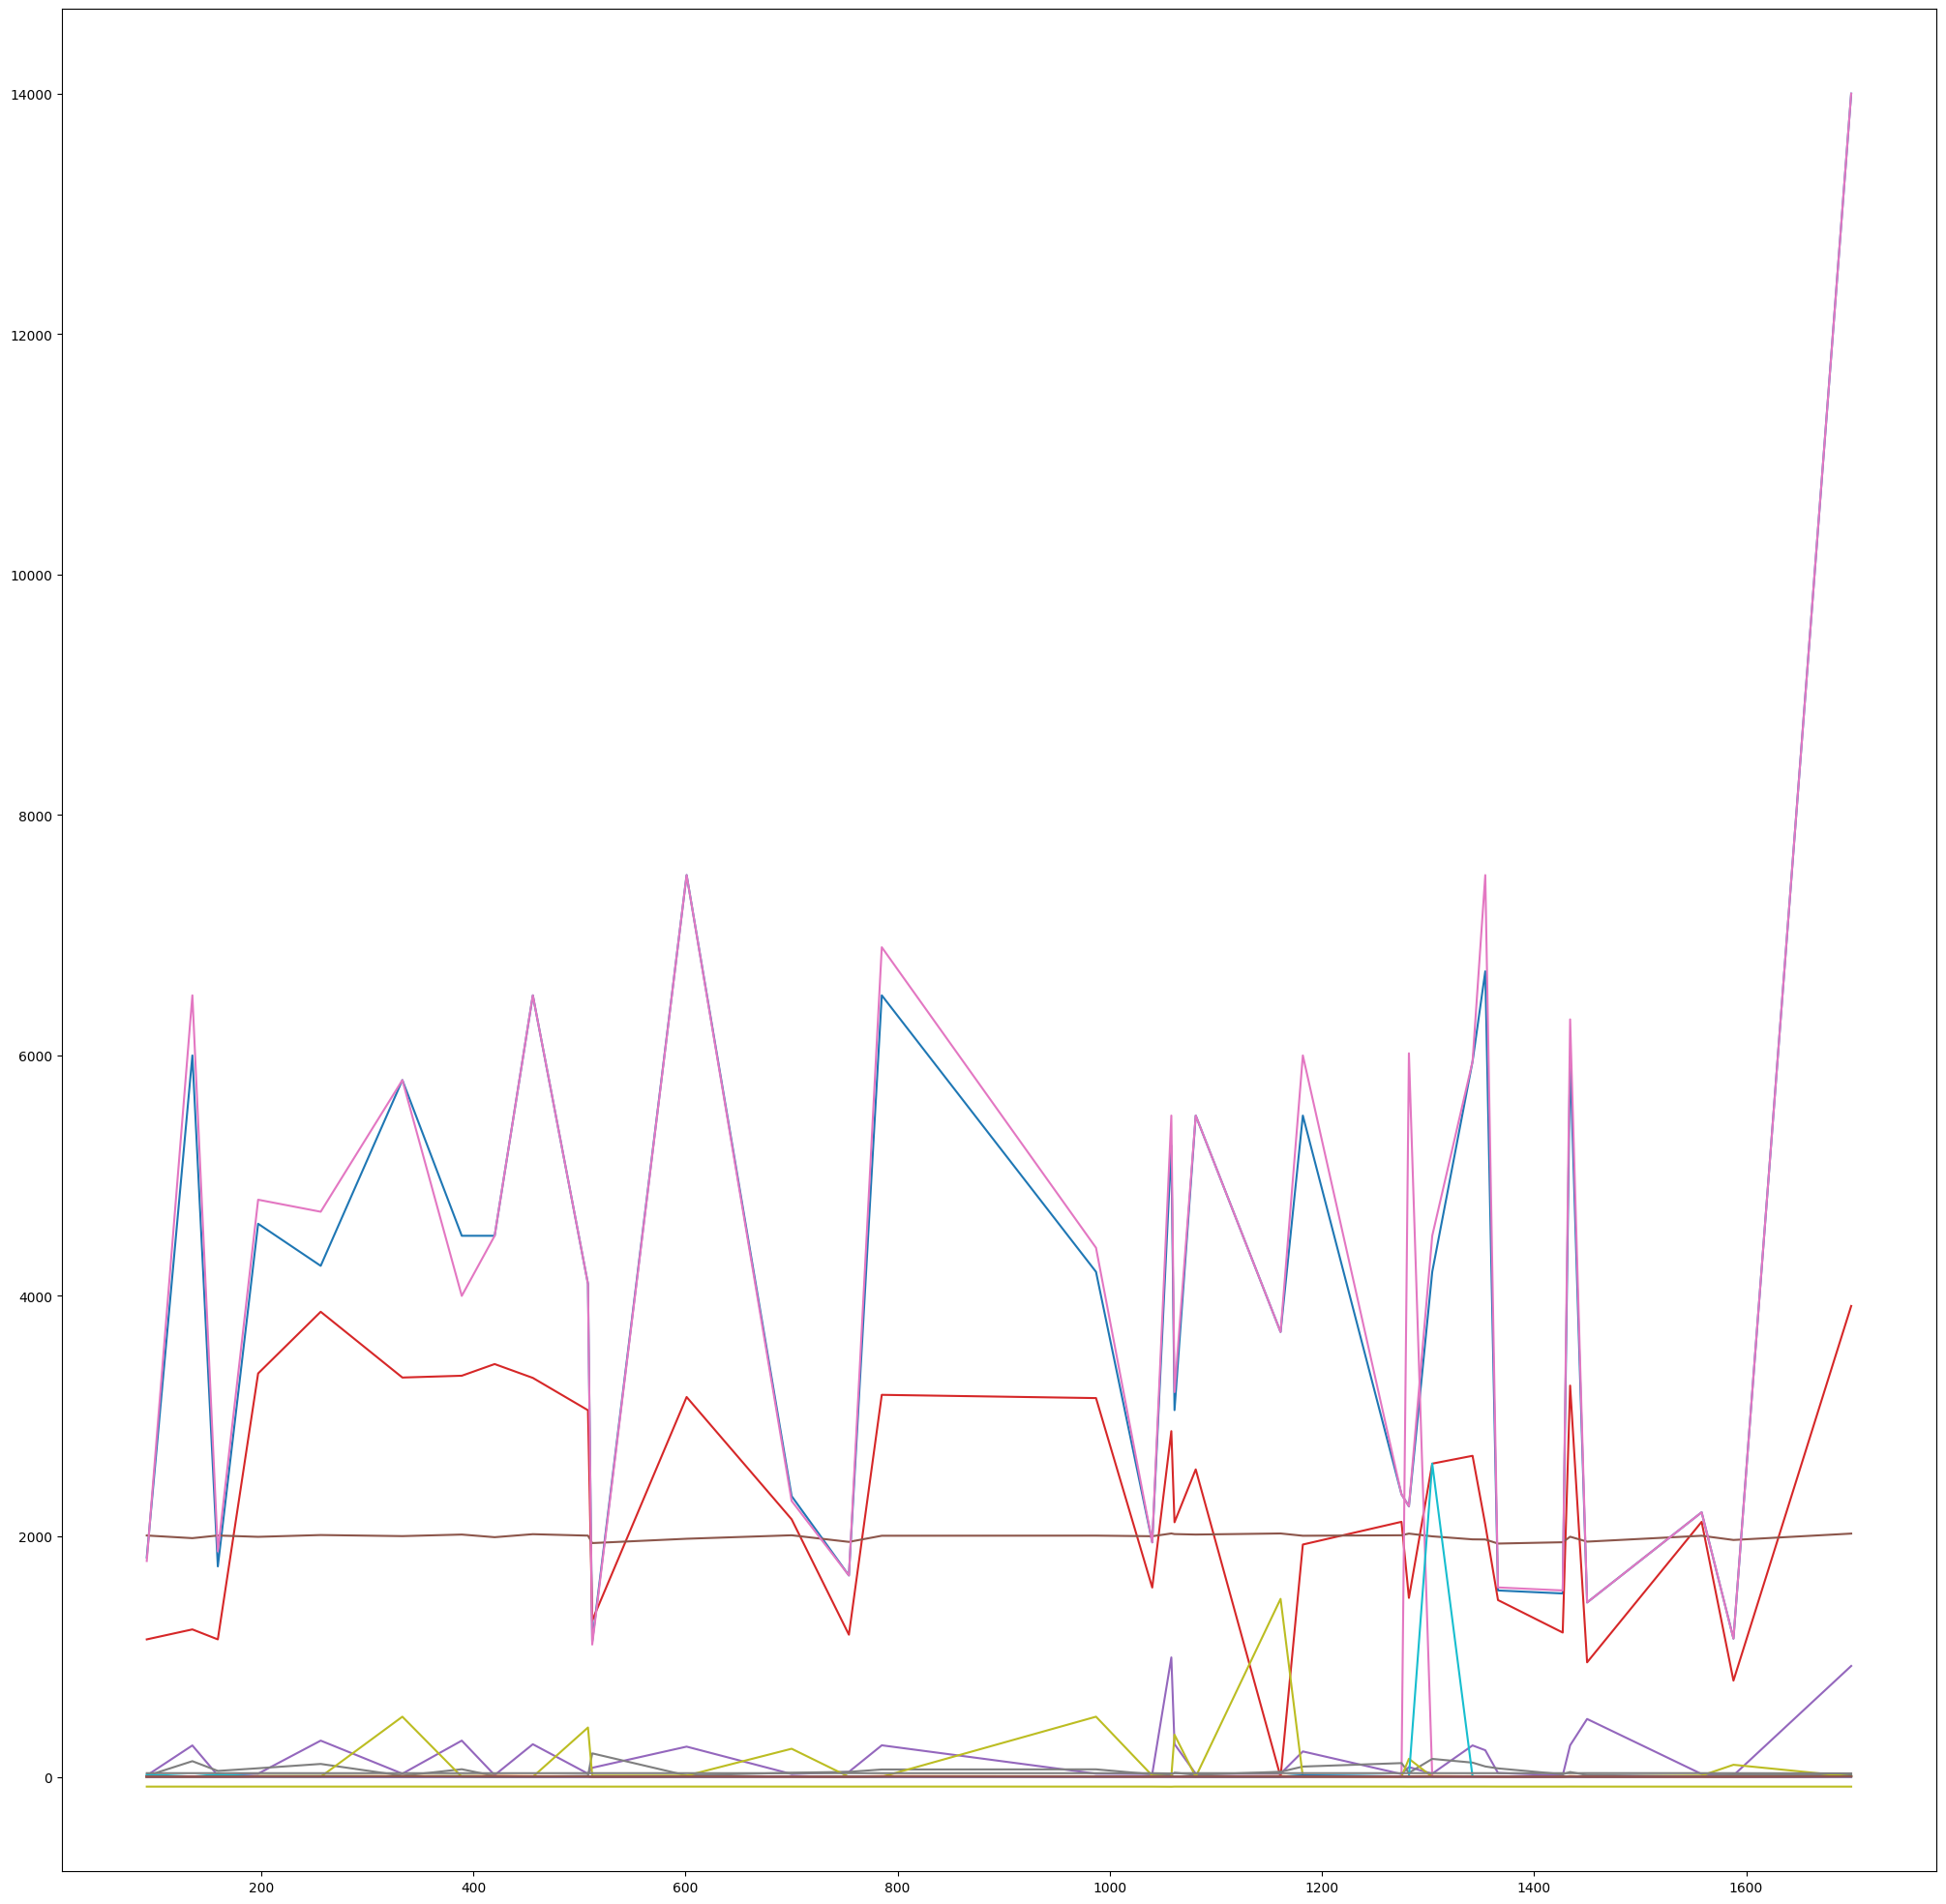

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25));
plt.scatter(anomalies); 
plt.show()